# Install and import libraries

In [ ]:
%%capture
!pip install whit-phys-util

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as const
from scipy.constants import mu_0

# Connect to GitHub

In [ ]:
repo = buc.local_repository("https://github.com/PS453-SP23/magnetic-force-part-2-lydia-and-grant")

Repository exists at this location. Pulling changes from GitHub.


In [ ]:
repo.pull()

# Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| Magnetic Force apparatus | TeachSpin | MF1-A | MF670 |
| DC power supply (up to 3 A) | TeachSpin | HY5003D | N0 361399 |
| Banana plugs (several) | N/A | N/A | N/A |


_You should replace the **fill in** entries with appropriate info._

# Theoretical Foundations

## Draw a qualitatively correct free body diagram for case B

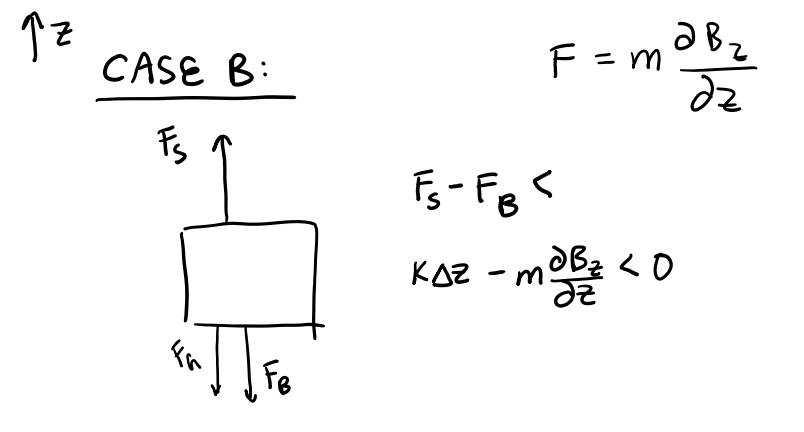

## Write down Newton's second law for case B

see diagram above

## Draw a qualitatively correct free body diagram for case C

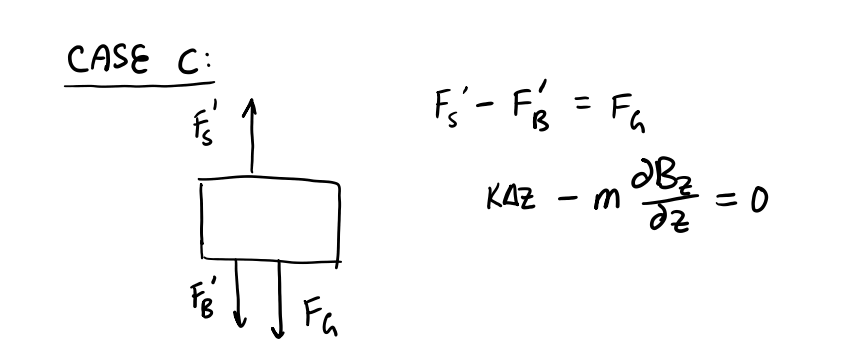

## Write down Newton's second law for case C

see diagram above

## Under what conditions would the magnetic force in case B equal the magnetic force in case C?

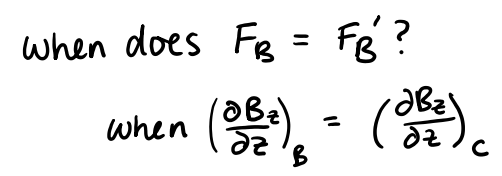

## Write an expression for the magnetic field gradient in terms of $m$, $M$, $g$, $k$, and $\Delta z$

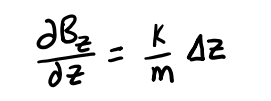

## Explain **where** your expression for the magnetic field gradient is applicable

this is aplicable for linear $\vec{B}$ and small $Δz$

# Experiment measurements

## Determining the spring constant

In [ ]:
df_spring = pd.read_table('mass_stretch_data.tsv')

In [ ]:
avg_mass = (5.3)/5 #g 
mass = [0, avg_mass, avg_mass*2, avg_mass*3, avg_mass*4, avg_mass*5]

In [ ]:
df_spring['Weight (mN)'] = mass
df_spring['Weight (mN)'] = df_spring['Weight (mN)']*9.81

In [ ]:
df_spring

,Number of Bearings,Position (cm),Weight (mN)
0,0,12.0,0.0000
1,1,11.2,10.3986
2,2,10.4,20.7972
3,3,9.6,31.1958
4,4,8.8,41.5944
5,5,8.1,51.9930


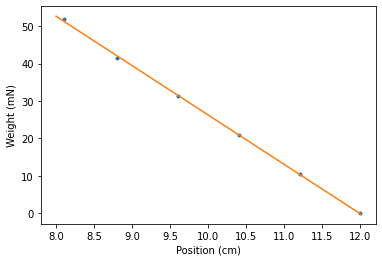

In [ ]:
plt.plot(df_spring['Position (cm)'], df_spring['Weight (mN)'], '.')
plt.xlabel('Position (cm)')
plt.ylabel('Weight (mN)')

fittable, fitfunc = buc.prettyPolyFit(df_spring['Position (cm)'], df_spring['Weight (mN)']);
x = np.linspace(8,12,25);

plt.plot(x, fitfunc(x));

In [ ]:
fittable

,slope,intercept
value,-13.228751,158.504489
uncertainty,0.277732,2.806809


Since $ F = k \Delta x $, the spring constant is the slope of the best fit line

In [ ]:
k = fittable['slope']['value']*10**(-3) # N/cm
uk = fittable['slope']['uncertainty']*10**(-3)

## Determining the magnetic dipole moment of a permanent magnet

In [ ]:
z0 = 66.59 #mm

In [ ]:
df_dipole = pd.read_table('field_stretch_data.tsv')

In [ ]:
df_dipole

,Current (A),Position (mm)
0,0.5,72.69
1,1.0,77.88
2,1.5,82.73
3,2.0,89.97
4,2.5,95.39
5,3.0,101.20


In [ ]:
df_dipole['Delta z (cm)'] = (df_dipole['Position (mm)']- z0)*1/10

In [ ]:
N = 168
R = 0.07
def dBdz(I, z):
  z = z/100 # convert z in cm to m
  dbdz_in_T = 0.5*mu_0*N*I*R**2*-3*z/(R**2+z**2)**(5/2)
  return dbdz_in_T*100# field in T/cm

In [ ]:
def dB_antihdz(I,z):
  return dBdz(I, z-3.5)+dBdz(-I,z+3.5)

In [ ]:
df_dipole['Mag Field Gradient (T/cm)'] = dB_antihdz(df_dipole['Current (A)'], 0)

In [ ]:
df_dipole

,Current (A),Position (mm),Delta z (cm),Mag Field Gradient (T/cm)
0,0.5,72.69,0.610,1.849734
1,1.0,77.88,1.129,3.699468
2,1.5,82.73,1.614,5.549202
3,2.0,89.97,2.338,7.398936
4,2.5,95.39,2.880,9.248670
5,3.0,101.20,3.461,11.098404


Calculating the magnetic dipole moment using a plot of $Δ z$ v.s. $\frac{∂ B_z}{∂ z}$

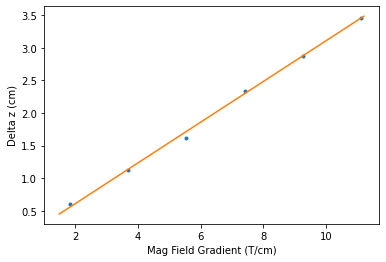

In [ ]:
plt.plot(df_dipole['Mag Field Gradient (T/cm)'],df_dipole['Delta z (cm)'], '.')

plt.xlabel('Mag Field Gradient (T/cm)')
plt.ylabel('Delta z (cm)')

dip_fittable, dip_fitfunc = buc.prettyPolyFit(df_dipole['Mag Field Gradient (T/cm)'],df_dipole['Delta z (cm)']);
delta_z = np.linspace(1.5,11.2,25);

plt.plot(delta_z, dip_fitfunc(delta_z));

In [ ]:
dip_fittable

,slope,intercept
value,0.312508,-0.017867
uncertainty,0.015883,0.114417


SInce $\Delta z = \frac{m}{k} \frac{∂ B_z}{∂ z}$, $m$ can be found by multiplying the slope by $k$

In [ ]:
m = dip_fittable['slope']['value']*k # [N * cm/T]
um = dip_fittable['slope']['uncertainty']*k

In [ ]:
print(f'Magnetic dipole moment is {m: .3} +- {um: .1}')

Magnetic dipole moment is -0.00413 +- -0.0002


##  Measuring the magnetic field gradient for a single coil set

In [ ]:
df_map = pd.read_table('field_map_data.tsv')

In [ ]:
df_map

,z (cm),"Rod, no field (cm)","Rod, with field (cm)"
0,4.0,10.555,10.739
1,4.5,11.065,11.522
2,5.0,11.574,12.494
3,5.5,12.053,13.342
4,6.0,12.586,14.054
5,6.5,13.000,14.600
6,7.0,13.500,15.200
7,8.0,14.500,16.100
8,9.0,15.500,16.900
9,10.0,16.500,17.700


In [ ]:
df_map['Spring stretch (cm)'] = df_map[' Rod, with field (cm)'] -  df_map['Rod, no field (cm)']

In [ ]:
df_map['dBdz (mT/cm)'] = k/m*df_map['Spring stretch (cm)']

In [ ]:
df_map['z (cm)'] = df_map['z (cm)'] - 4
df_map['z (cm)']

0      0.0
1      0.5
2      1.0
3      1.5
4      2.0
5      2.5
6      3.0
7      4.0
8      5.0
9      6.0
10     7.0
11     8.0
12     9.0
13    10.0
Name: z (cm), dtype: float64

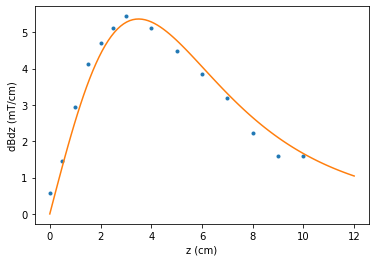

In [ ]:
plt.plot(df_map['z (cm)'], df_map['dBdz (mT/cm)'], '.');
plt.xlabel('z (cm)')
plt.ylabel('dBdz (mT/cm)')

xspace = np.linspace(0, 12, 100);
plt.plot(xspace, dBdz(-2.9,xspace));

Systematic error might have arisen from the way we collected our displacement data because we defined the center of the coil to be at $z = 4$, while it's actually at $z = 3.7$ causing the data to be shifted. 

Systematic error may also have come from our theory, which assumed that all of the coils are at $z = 0$.

By trial and error, we can get closer to a true approximation of $z$ at the center of the coil:

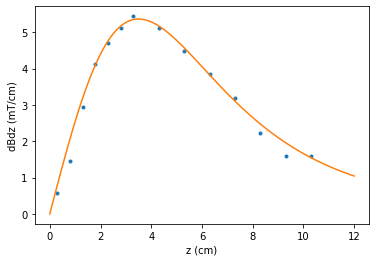

In [ ]:
plt.plot(df_map['z (cm)'] + 0.3, df_map['dBdz (mT/cm)'], '.');
plt.xlabel('z (cm)')
plt.ylabel('dBdz (mT/cm)')

plt.plot(xspace, dBdz(-2.9,xspace));